


Support Vector Machines


Parâmetros: shrinking= False, degree=1, probability=False, C=1, tol=0.001, coef0=0
Melhores Parâmetros:  {'shrinking': False, 'C': 2, 'probability': False, 'tol': 0.001, 'coef0': 0, 'degree': 1}

Accuracy: 0.735849

             precision    recall  f1-score   support

          0       0.71      0.81      0.76        27
          1       0.77      0.65      0.71        26

avg / total       0.74      0.74      0.73        53



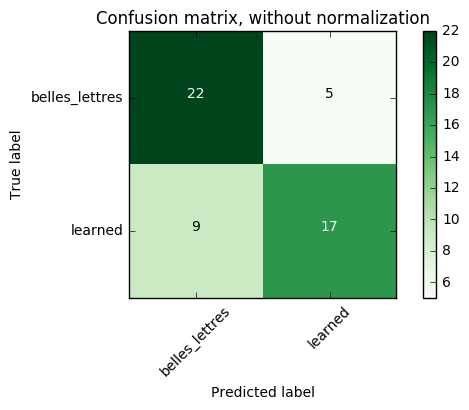

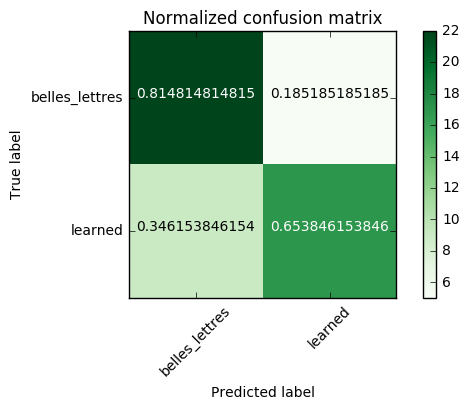


Accuracy: 0.735849

             precision    recall  f1-score   support

          0       0.71      0.81      0.76        27
          1       0.77      0.65      0.71        26

avg / total       0.74      0.74      0.73        53




Stochastic Gradient Descent
Parâmetros: n_iter=10, power_t=1, average=True, l1_ratio=0.15, epsilon=0.1, fit_intercept=False, alpha=0.0001
Melhores Parâmetros:  {'power_t': 3, 'l1_ratio': 0.15, 'average': True, 'fit_intercept': False, 'epsilon': 0.5, 'n_iter': 5, 'alpha': 0.0001}

Accuracy: 0.754717

             precision    recall  f1-score   support

          0       0.75      0.78      0.76        27
          1       0.76      0.73      0.75        26

avg / total       0.75      0.75      0.75        53



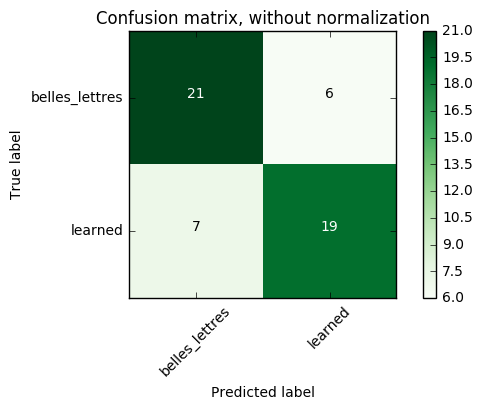

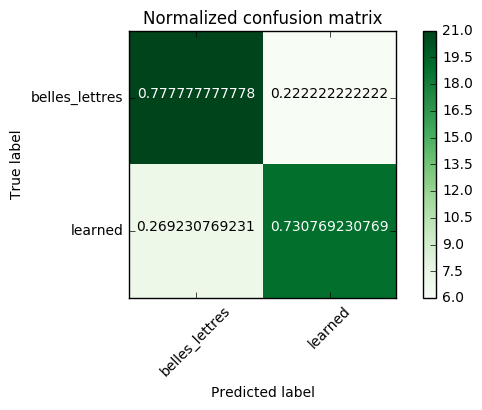





Nearest Neighbors


Parâmetros: n_neighbors=4
Melhores Parâmetros:  {'n_neighbors': 4}

Accuracy: 0.471698

             precision    recall  f1-score   support

          0       0.33      0.04      0.07        27
          1       0.48      0.92      0.63        26

avg / total       0.41      0.47      0.34        53



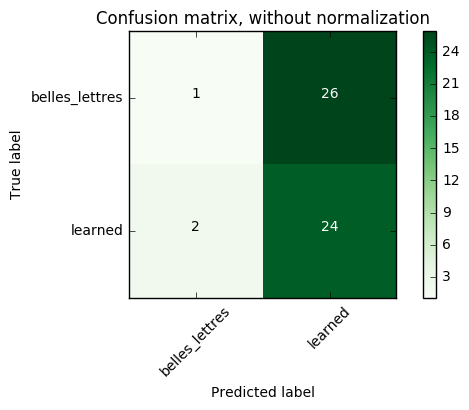

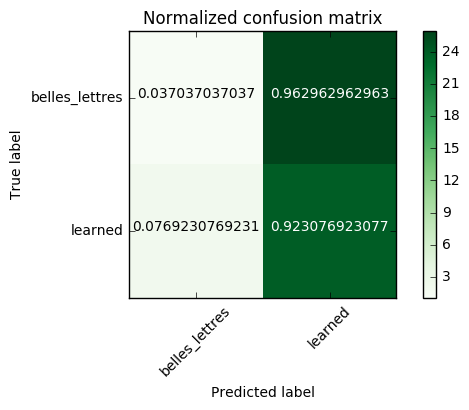

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
import math
from nltk.probability import FreqDist
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from scipy.stats import expon as sp_expon
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import urllib.request
from sklearn import svm
from sklearn import datasets
from sklearn import tree
from random import randint


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Duas maais frequentes categorias
categorias = ["",""] 
frequencia = [0,0]
for c in brown.categories():
	if frequencia[0] == 0:
		frequencia[0] = len(brown.fileids(categories=c))
		categorias[0] = c
	
	elif frequencia[1] == 0:
		frenquencia[1] = len(brown.fileids(categories=c))
		categorias[1] = c

	if len(brown.fileids(categories=c)) > frequencia[1]:
		frequencia[1] = len(brown.fileids(categories=c))
		categorias[1] = c 

	if frequencia[1] > frequencia[0]:
		aux = frequencia[0]
		frequencia[0] = frequencia[1]
		frequencia[1] = aux
		aux2 = categorias[0]
		categorias[0] = categorias[1]
		categorias[1] = aux2
documentos = []
classe = []

for category in categorias:
	for fileid in brown.fileids(category):
		documentos.append(list(brown.words(fileid)))
		if  category == "learned":
			classe.append(0)
		else:
			classe.append(1)

ps = PorterStemmer()
punctuations = list(string.punctuation)
punctuations.append("''")
stop_words = set(stopwords.words("english"))
doc_processado = []
# Data completa

for x in range(0,len(documentos)):
	palavras = []
	for y in range(0,len(documentos[x])):
		if documentos[x][y] not in punctuations:
			if documentos[x][y] not in  stop_words:
				palavras.append(ps.stem(documentos[x][y]).lower())
	doc_processado.append(palavras)



#classe data
words = []
for x in range(0, len(doc_processado)):
	for i in doc_processado[x]:
		if i not in words:
			words.append(i)
		if len(words) == 16746:
			break

freqdist = []
for x in range(0,len(doc_processado)):
	freqdist.append(FreqDist(doc_processado[x]))

tf = []
for x in range(0, len(doc_processado)):
	linha = []
	for w in words:
		linha.append(freqdist[x][w])
	tf.append(linha)

frequenciaEmDocumentos = [0] * len(words)
for x in range(0,len(doc_processado)):
	for y in range(0,len(words)):
		if tf[x][y] != 0:
			frequenciaEmDocumentos[y] += 1


tf_idf = []
for x in range(0, len(doc_processado)):
	linha = []
	for y in range(0, len(words)):
		linha.append(tf[x][y] * math.log(len(doc_processado)/frequenciaEmDocumentos[y]))
	tf_idf.append(linha)

data = tf_idf
classeData = classe
dataAprendizagem = []
classeAprendizagem = []

limite = len(data)
for i in range(0, int(len(data)*0.66)):
	x = randint(0,limite-1) 
	dataAprendizagem.append(data[x])
	data.remove(data[x])
	classeAprendizagem.append(classeData[x])
	classeData.remove(classeData[x])
	limite = limite - 1
X = dataAprendizagem
y = classeAprendizagem

print("\n\n\nSupport Vector Machines")
print("\n\nParâmetros: shrinking= False, degree=1, probability=False, C=1, tol=0.001, coef0=0")


parameters = { 
'C':[1,2],
'coef0':[0,2,3,5],
'degree':[1,3,5,7,9,10],
'probability':[False, True],
'shrinking': [False, True], 
'tol': [0.001, 0.1, 1]
}

svr = svm.SVC()
clt = GridSearchCV(svr, parameters)
clt.fit(X,y)
print("Melhores Parâmetros: ", clt.best_params_)

# Support Vector Machines http://scikit-learn.org/stable/modules/svm.html
clf = svm.SVC(shrinking= False, degree=1, probability=False, C=1, tol=0.001, coef0=0)
clf.fit(X, y)
result_svm = clf.predict(data)


class_names = ['belles_lettres','learned']

print('\nAccuracy: %f\n' % metrics.accuracy_score(classeData, result_svm) )
print(classification_report(classeData, result_svm))

# Compute confusion matrix
cnf_matrix = confusion_matrix(classeData, result_svm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('\nAccuracy: %f\n' % metrics.accuracy_score(classeData, result_svm) )
print(classification_report(classeData, result_svm))

print("\n\n\nStochastic Gradient Descent")
print("Parâmetros: n_iter=10, power_t=1, average=True, l1_ratio=0.15, epsilon=0.1, fit_intercept=False, alpha=0.0001")


parameters = { 
'alpha': [0.0001,0.01,0.1], 
'average':[False, True], 
'epsilon': [0.1,0.3,0.5],
'fit_intercept':[True,False], 
'l1_ratio':[0.15,0.3,0.6],
'n_iter':[5,10,15],
'power_t':[0.5,1,3]
}

svr = SGDClassifier()
clt = GridSearchCV(svr, parameters)
clt.fit(X,y)
print("Melhores Parâmetros: ", clt.best_params_)

#Stochastic Gradient Descent http://scikit-learn.org/stable/modules/sgd.html
clf = SGDClassifier(n_iter=10, power_t=1, average=True, l1_ratio=0.15, epsilon=0.1, fit_intercept=False, alpha=0.0001)
clf.fit(X, y)
result_sgd = clf.predict(data)

print('\nAccuracy: %f\n' % metrics.accuracy_score(classeData, result_sgd) )
print(classification_report(classeData, result_sgd))

# Compute confusion matrix
cnf_matrix = confusion_matrix(classeData, result_sgd)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print("\n\n\n\nNearest Neighbors")
print("\n\nParâmetros: n_neighbors=4")

parameters = { 
'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 
}

svr = KNeighborsClassifier()
clt = GridSearchCV(svr, parameters)
clt.fit(X,y)
print("Melhores Parâmetros: ", clt.best_params_)



#Nearest Neighbors http://scikit-learn.org/stable/modules/neighbors.html
clf =  KNeighborsClassifier(n_neighbors=4)
clf = clf.fit(X, y)
resultKN = clf.predict(data)

print('\nAccuracy: %f\n' % metrics.accuracy_score(classeData, resultKN) )
print(classification_report(classeData, resultKN))

# Compute confusion matrix
cnf_matrix = confusion_matrix(classeData, resultKN)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Para a resolução do problema, foi extraído as duas categarias mais frequêntes, que foram learned com frequência de 80 e belles_lettres com 75. Foi extraído os tokens, eliminando pontuações, stopwords e realizando stemming.

O TF-IDF foi cálculado manualmente, depois foi separado de forma randomica, 66% da base para aprendizado e 34% para teste, o que da um total de 99 textos para aprendizagem 51 para o teste.

Foi analisado as melhores combinações de hyperparâmetros com o GridSearchCV, para os algoritmos: Support Vector Machines, Stochastic Gradient Descent e o Nearest Neighbors.

Os melhores parâmetros para cada algotimo foi:

SVM: shrinking= False, degree=1, probability=False, C=1, tol=0.001, coef0=0
SGD: n_iter=10, power_t=1, average=True, l1_ratio=0.15, epsilon=0.1, fit_intercept=False, alpha=0.0001
neighbors: n_neighbors=4

O algoritmo que apresentou melhor resultado foi o SGD com a accuracy de 0.75, o SVM também apresentou bom resultado com accuracy de 0.73, já o neighbors não obteve bom resultado com accuracy de 0.47.